# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

## PART 1: 
- 20 Newsgroups Corpus


## PART 2:
- Republican vs Democrat Tweet Classifier

In [1]:
# NLTK is our Natural-Language-Took-Kit Idk why not working for me nltk not being read
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger') # may need to use if nltk is updated or something
stopwords = stopwords.words('english')

ModuleNotFoundError: No module named 'nltk'

In [ ]:
# Import pandas for data handling
import pandas as pd



# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Import our metrics to evaluate our model
from sklearn import metrics
from sklearn.metrics import classification_report


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns



## Load and display data.
1. Load the 20-newsgroups.csv data into a dataframe.
1. Print the shape
1. Inspect / remove nulls and duplicates
1. Find class balances, print out how many of each topic_category there are.

In [ ]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/20-newsgroups.csv')
print(df.shape) #11314, 4

(11314, 4)


In [ ]:
# 3. Inspect / remove nulls and duplicates
print(df.isnull().sum()) # all good

id                0
message           0
topic             0
topic_category    0
dtype: int64


In [ ]:
print(df.duplicated().sum()) # all good

0


In [ ]:
# 4. Find class balances, print out how many of each topic_category there are.
df.topic_category.value_counts()

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
comp.windows.x              593
sci.space                   593
sci.electronics             591
comp.os.ms-windows.misc     591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: topic_category, dtype: int64

# Text Pre-Processing 
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
2. Make a function that removes all punctuation. 
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
3. Make a function that removes all stopwords.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
4. EXTRA CREDIT (This step only): Make a function that stemms all words. 


5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline. 
    
    
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. 

In [ ]:
# 1. Make a function that makes all text lowercase.

test_string = 'This is A SENTENCE with LOTS OF CAPS.'

def lower_case(string):
    return string.lower()

lower_case(test_string)

'this is a sentence with lots of caps.'

In [ ]:
# 2. Make a function that removes all punctuation. 

test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'

def remove_punc(string):
    string = re.sub(r'[^\w\s]','',string)
    return string

remove_punc(test_string)


'This is a sentence 50 With lots of punctuation  other things'

In [ ]:
# 3. Make a function that removes all stopwords.

test_string = 'This is a sentence! With some different stopwords i have added in here.'

def remove_stopwords(string):
    words = word_tokenize(string)
    valid_words = []
    for word in words:
        if word not in stopwords:
            valid_words.append(word)
    string = ' '.join(valid_words)
    return string

remove_stopwords(test_string) # 'This sentence ! With different stopwords added .'

NameError: name 'word_tokenize' is not defined

In [ ]:
# 4. EXTRA CREDIT: Make a function that stemms all words. 

test_string = 'I played and started playing with players and we all love to play with plays'

def stem_words(string):
    porter = PorterStemmer() #nltk not working for me so sadly cant output
    words = word_tokenize(string) #apparently new version called snowball stemmer, better than porterstemmer
    valid_words = []
    for word in words:
        stemmed_word = porter.stem(word)
        valid_words.append(stemmed_word)
    string = ' '.join(valid_words)
    return string 

stem_words(test_string) # 'I play and start play with player and we all love to play with play'

NameError: name 'PorterStemmer' is not defined

In [ ]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.

test_string = 'I played and started playing with players and we all love to play with plays'

def text_pipeline(input_string):
    input_string = lower_case(input_string)
    input_string = remove_punc(input_string)
    return input_string

text_pipeline(test_string)

In [ ]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 
df['message_clean'] = df['message']
df['message_clean'] = df['message'].apply(text_pipeline) 
print("ORIGINAL TEXT\n:", df['message'][0])
print('#',80)
print("CLEANDED TEXT\n:", df['message_clean'][0])


ORIGINAL TEXT
: From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





# 80
CLEANDED TEXT
: from lerxstwamumdedu wheres my thing
subject what car is this
nntppostinghost rac3wamumdedu
organization university of maryland college park
lines 15

 i was wondering if anyone out there could enlighten me on this car i saw
the other day it

# Text Vectorization

1. Define your `X` and `y` data. 


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer. 
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [ ]:
# 1. Define your `X` and `y` data. 
df.head()
X = df['message_clean'].values
y = df['topic_category'].values

In [ ]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [ ]:
# 3. Fit your vectorizer using your X data
vectorizer.fit(X)



TfidfVectorizer()

In [ ]:
# 4. Transform your X data using your fitted vectorizer. 

X = vectorizer.transform(X)


In [ ]:
# 5. Print the shape of your X.  How many features (aka columns) do you have?
print(X.shape, type(X))
print(X.shape[1]) # feature count

(11314, 139904) <class 'scipy.sparse._csr.csr_matrix'>


# Split your data into Training and Testing data. 

In [ ]:
# Split our data into testing and training like always. 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents. 

1. Initalize an empty model. 
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you. 

In [ ]:
# 1. Initalize an empty model. 

model = MultinomialNB(alpha=.05)

In [ ]:
# Fit our model with our training data.

model.fit(X_train, y_train)

MultinomialNB(alpha=0.05)

# Evaluate the model.

1. Make new predicitions using our test data. 
2. Print the accuracy of the model. 
3. Print the confusion matrix of our predictions. 
4. Using `classification_report` print the evaluation results for all the classes. 



In [ ]:
# 1. Make new predictions of our testing data. 

y_pred = model.predict(X_test)

In [ ]:
# 2. Print the accuracy of the model. 
accuracy = model.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.912064


c:\Users\Cenzo Oh\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


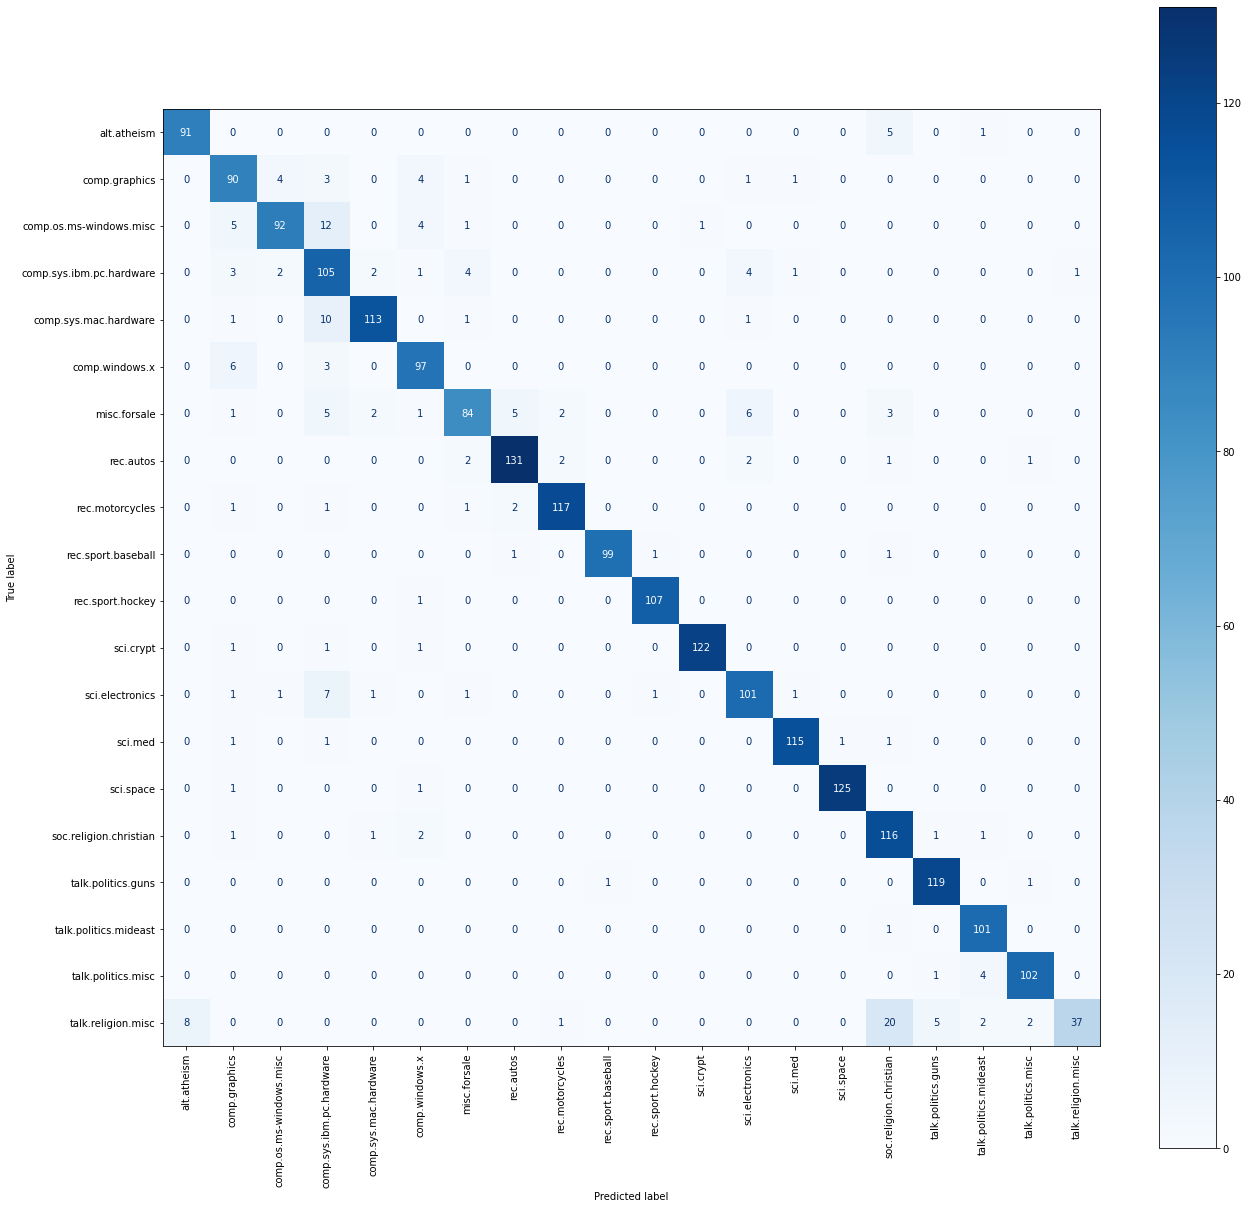

In [ ]:
# 3. Plot the confusion matrix of our predictions

fig, ax = plt.subplots(figsize=(21, 21))
disp = plot_confusion_matrix(model, X_test, y_test,
                             display_labels=model.classes_,
                             cmap=plt.cm.Blues, ax=ax) 
plt.xticks(rotation=90)
disp

In [ ]:
# 4. Using `classification_report` print the evaluation results for all the classes. 
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred, target_names=model.classes_))

                          precision    recall  f1-score   support

             alt.atheism       0.92      0.94      0.93        97
           comp.graphics       0.80      0.87      0.83       104
 comp.os.ms-windows.misc       0.93      0.80      0.86       115
comp.sys.ibm.pc.hardware       0.71      0.85      0.77       123
   comp.sys.mac.hardware       0.95      0.90      0.92       126
          comp.windows.x       0.87      0.92      0.89       106
            misc.forsale       0.88      0.77      0.82       109
               rec.autos       0.94      0.94      0.94       139
         rec.motorcycles       0.96      0.96      0.96       122
      rec.sport.baseball       0.99      0.97      0.98       102
        rec.sport.hockey       0.98      0.99      0.99       108
               sci.crypt       0.99      0.98      0.98       125
         sci.electronics       0.88      0.89      0.88       114
                 sci.med       0.97      0.97      0.97       119
         

# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns. 
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`. 
4. Print the prediction

In [ ]:
#first i want to see an example of talk politics guns
df.head()


,id,message,topic,topic_category,message_clean
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos,from lerxstwamumdedu wheres my thing\r\nsubjec...
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware,from guykuocarsonuwashingtonedu guy kuo\r\nsub...
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware,from twillisececnpurdueedu thomas e willis\r\n...
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics,from jgreenamber joe green\r\nsubject re weite...
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space,from jcmheadcfaharvardedu jonathan mcdowell\r\...


In [ ]:
my_sentence = 'I am going to the gun range and use my ak-47 there are laws with gun regulation.'

# 1. Apply the text pipeline to your sentence
my_sentence=text_pipeline(my_sentence) #again the nltk not working doesnt help this error

# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\
vectorized_sentence = vectorizer.transform([my_sentence])

# 3. Use the model to predict your new `X`. 
model.predict(vectorized_sentence) 
 
# 4. Print the prediction


NameError: name 'text_pipeline' is not defined

___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican. 

Can you get an f1-score higher than %82

Because tweets are so small already, try not removing stopwords....

In [ ]:
# 1. Load the dem-vs-rep-tweets data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/dem-vs-rep-tweets.csv') #given

print(df.shape, "\n")
print(df.head()) #86460, 3


(86460, 3) 

      Party         Handle                                              Tweet
0  Democrat  RepDarrenSoto  Today, Senate Dems vote to #SaveTheInternet. P...
1  Democrat  RepDarrenSoto  RT @WinterHavenSun: Winter Haven resident / Al...
2  Democrat  RepDarrenSoto  RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3  Democrat  RepDarrenSoto  RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4  Democrat  RepDarrenSoto  RT @Vegalteno: Hurricane season starts on June...


In [ ]:
print(df.isnull().sum())
print(df.duplicated().sum())

Party     0
Handle    0
Tweet     0
dtype: int64
57


In [ ]:
 #did not finish

KeyError: 'Party'